In [4]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

plt.style.use('default')
plt.rcParams['figure.figsize'] = [5.0,5.0]

df = pd.read_csv('data/train.csv',dtype={'tipodepropiedad':'category','ciudad':'category','provincia':'category'})
df['fecha'] = pd.to_datetime(df['fecha']).dt.month
#df['anio de publicacion'] = df['fecha'].dt.year
#df["mes de publicacion"] = df['fecha'].dt.month
#df["dia de publicacion"] = df['fecha'].dt.day
df['preciousd'] = df['precio']/20

In [6]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,preciousd
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,NaN,NaN,8,0.0,0.0,0.0,0.0,0.0,2273000.0,113650.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,19.310205,-99.227655,6,0.0,0.0,0.0,1.0,1.0,3600000.0,180000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,NaN,NaN,10,0.0,0.0,0.0,0.0,0.0,1200000.0,60000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,19.301890,-99.688015,3,0.0,0.0,0.0,1.0,1.0,650000.0,32500.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,NaN,NaN,6,0.0,0.0,0.0,0.0,0.0,1150000.0,57500.0


# Analisis de los tipos de propiedades

In [10]:
propiedades_counts = df['tipodepropiedad'].value_counts()
propiedades_counts

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

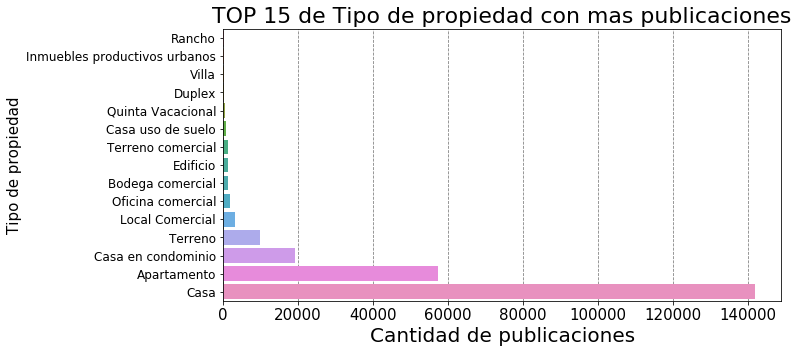

In [4]:
count_tipo = df.tipodepropiedad.value_counts().sort_values(ascending=False).head(15).sort_values()

plt.figure(figsize=(10,5))
ax = sns.barplot(y=count_tipo.index,x=count_tipo.values,order=count_tipo.index)
ax.set_ylabel('Tipo de propiedad', fontsize=15)
ax.set_xlabel('Cantidad de publicaciones', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.set_axisbelow(True)
ax.set_title('TOP 15 de Tipo de propiedad con mas publicaciones', fontsize=22);
ax.xaxis.grid(linestyle='dashed', color='gray')


# Analisis por provincia

<Figure size 720x720 with 0 Axes>

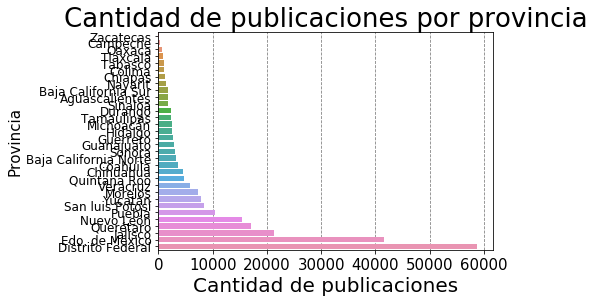

<Figure size 720x720 with 0 Axes>

In [5]:
conteo = df.provincia.value_counts().sort_values()



ax = sns.barplot(y=conteo.index,x=conteo.values,order=conteo.index)
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Cantidad de publicaciones', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.set_axisbelow(True)
ax.set_title('Cantidad de publicaciones por provincia', fontsize=26);
ax.xaxis.grid(linestyle='dashed', color='gray')
plt.figure(figsize=(10,10))

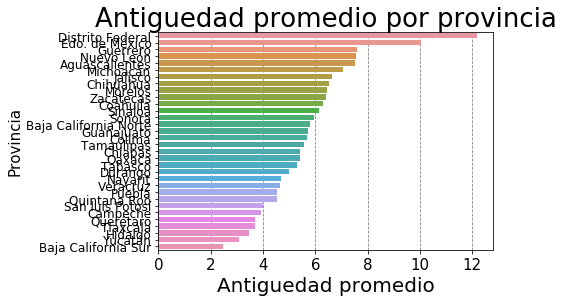

In [6]:
plot = df.groupby('provincia').agg({'antiguedad': 'mean'})\
    .sort_values('antiguedad', ascending=False)\

ax = sns.barplot(y=plot.index,x=plot.antiguedad,order=plot.index)
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Antiguedad promedio', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.set_axisbelow(True)
ax.set_title('Antiguedad promedio por provincia', fontsize=26);
ax.xaxis.grid(linestyle='dashed', color='gray')
plt.rcParams['figure.figsize'] = [8.0,8.0]

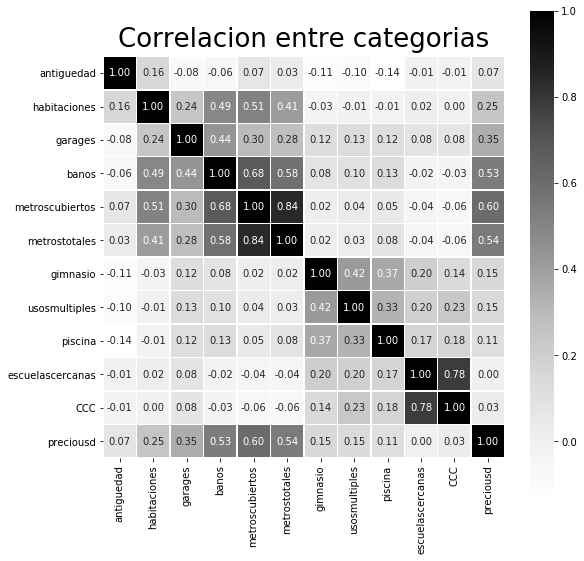

In [7]:
columns = ['antiguedad','habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales','gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos','preciousd']
corr = df
corr['metrostotales'].fillna(corr['metroscubiertos'], inplace=True)
corr['metroscubiertos'].fillna(corr['metrostotales'], inplace=True)
corr['metrostotales'].fillna(corr['metroscubiertos'], inplace=True)
corr['metroscubiertos'].fillna(corr['metrostotales'], inplace=True)
forheatmap = corr.loc[:, columns]
forheatmap = forheatmap.rename(columns={"centroscomercialescercanos":"CCC"})
plt.figure(figsize=(9, 9))
ax = sns.heatmap(forheatmap.corr(), square=True, annot=True, fmt='.2f', linewidths=.5,cmap="Greys")
ax.set_ylim(12,-0.1)
ax.set_title('Correlacion entre categorias', fontsize=26);


Del plot anterior se puede decir que a medida que tengo mas metros cubiertos, aumenta el valor, seguido de metros totales y banos. No tiene mucha importancia la piscina, los usos multiples y la antiguedad a la hora de ver el precio. Se puede ver como si aumentan los metros cubiertos, aumentan los baños mas que las habitaciones.


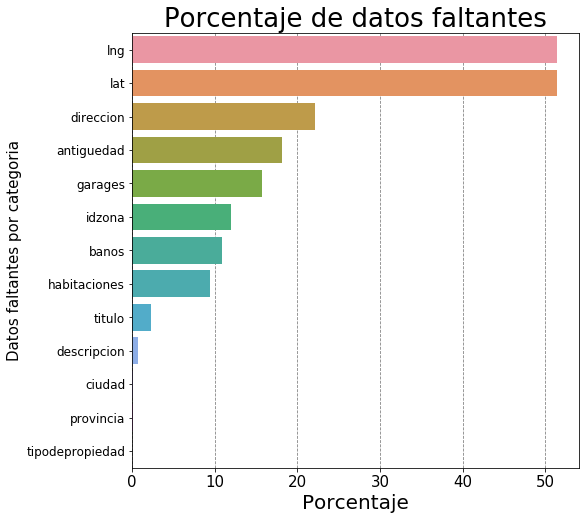

In [8]:
#Porcentaje de datos faltantes. eliminando los que tienen un 0%
errores_de_nan = (df.isnull().sum() / len(df)) * 100
errores_de_nan = errores_de_nan.drop(errores_de_nan[errores_de_nan == 0].index).sort_values(ascending=False)
ax = sns.barplot(y=errores_de_nan.index,x=errores_de_nan.values)
ax.set_ylabel('Datos faltantes por categoria', fontsize=15)
ax.set_xlabel('Porcentaje', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.set_axisbelow(True)
ax.set_title('Porcentaje de datos faltantes', fontsize=26);
ax.xaxis.grid(linestyle='dashed', color='gray')
ax.figsize=(5, 5)


# Analisis de habitaciones totales por propiedades
### Tomando como habitaciones totales = garage + habitaciones + baños

In [9]:
df["Tot Habitaciones"]= df["banos"].values+df["habitaciones"].values+df["garages"].values

Text(0, 0.5, 'Cantidad de propiedades')

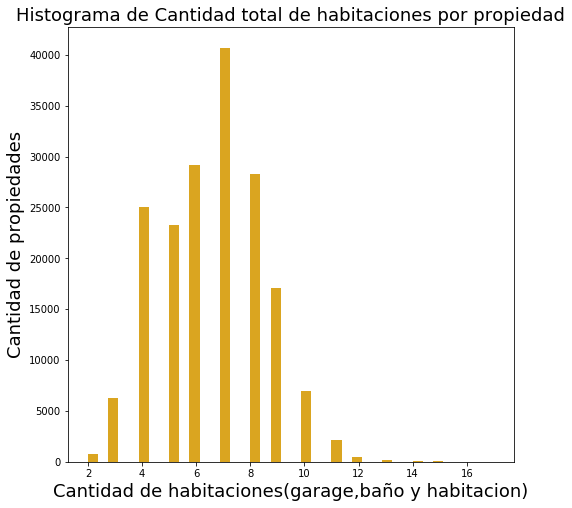

In [10]:
todo = df.loc[:,['tipodepropiedad',"Tot Habitaciones"] ]
g = todo['Tot Habitaciones'].plot.hist(bins=40, color='goldenrod')
g.set_title("Histograma de Cantidad total de habitaciones por propiedad", fontsize=18)
g.set_xlabel("Cantidad de habitaciones(garage,baño y habitacion)",fontsize=18)
g.set_ylabel("Cantidad de propiedades", fontsize=18)

Text(0, 0.5, 'Cantidad de casas')

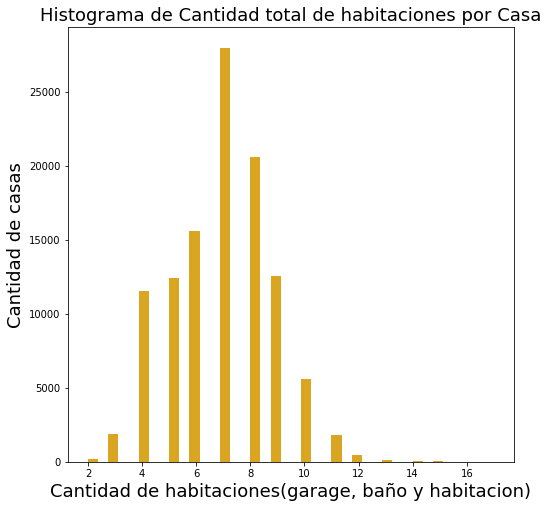

In [11]:
casa = df.loc[lambda x:x['tipodepropiedad'] == "Casa",["Tot Habitaciones"] ]
g = casa['Tot Habitaciones'].plot.hist(bins=40, color='goldenrod')
g.set_title("Histograma de Cantidad total de habitaciones por Casa", fontsize=18)
g.set_xlabel("Cantidad de habitaciones(garage, baño y habitacion)",fontsize=18)
g.set_ylabel("Cantidad de casas", fontsize=18)

Text(0, 0.5, 'Cantidad de Apartamentos')

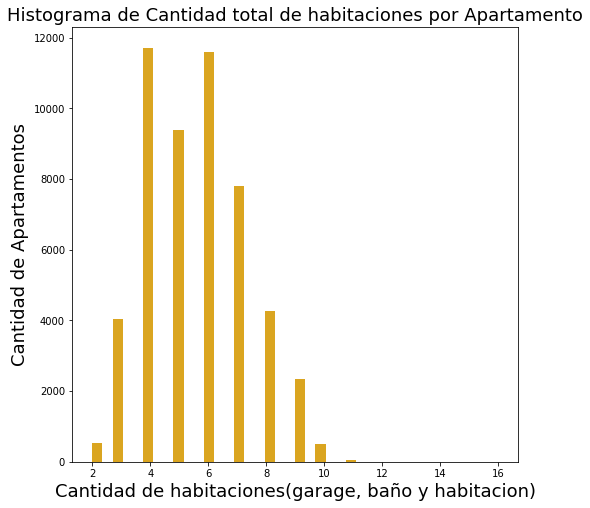

In [12]:
apart = df.loc[lambda x:x['tipodepropiedad'] == "Apartamento",["Tot Habitaciones"] ]
g = apart['Tot Habitaciones'].plot.hist(bins=40, color='goldenrod')
g.set_title("Histograma de Cantidad total de habitaciones por Apartamento", fontsize=18)
g.set_xlabel("Cantidad de habitaciones(garage, baño y habitacion)",fontsize=18)
g.set_ylabel("Cantidad de Apartamentos", fontsize=18)

Text(0, 0.5, 'Cantidad de propiedades')

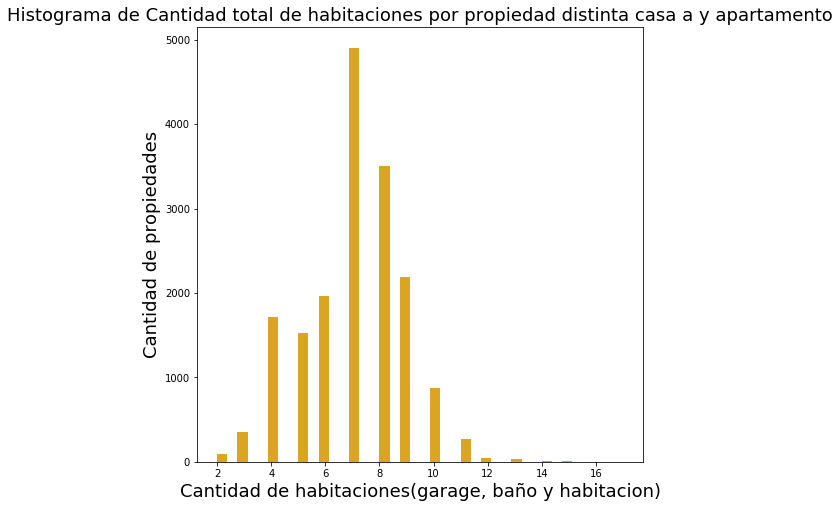

In [13]:
#Nose como usar condicionales con lambda (x[algo] != a dos cosas)
otros = df.loc[lambda x: x['tipodepropiedad'] != "Apartamento",:]
otros = otros.loc[lambda x: x['tipodepropiedad'] !="Casa" ,["Tot Habitaciones"]]
g = otros['Tot Habitaciones'].plot.hist(bins=40, color='goldenrod')
g.set_title("Histograma de Cantidad total de habitaciones por propiedad distinta casa a y apartamento", fontsize=18)
g.set_xlabel("Cantidad de habitaciones(garage, baño y habitacion)",fontsize=18)
g.set_ylabel("Cantidad de propiedades", fontsize=18)

In [23]:
df["banos"] = df["banos"].fillna(value=0)
df["habitaciones"] = df["habitaciones"].fillna(value=0)

df.pivot_table(index="banos",columns="habitaciones",values="preciom2usd",aggfunc="mean")

KeyError: 'preciom2usd'